# 数値計算  
- **Submission date**: 2017/12/01
- **Team**: へび  
- **Members**:  
    + #5501 Kazunori Sakai  
    + #5531 Akihiro Nitta  
    + #5557 Yuki Kotakehara  

## 8.5 課題 [p.82]  
**1**. 一山ピークへのフィット  
以下の $256$ 個のデータ  
```
ndata:=256;  
f1:=t->subs({a1=10,a2=40000,a3=380,a4=128},a1+a2/(a3+(t-a4)^2) );  
T:=[seq(f1(i)*(0.6+0.8*evalf(rand()/10^12)),i=1..ndata)]:  
f:=t->a1+a2/(a3+(t-a4)^2);  '
```
で近似した時のパラメータ $a1, a2, a3, a4$ を求めよ．ただし，パラメータの初期値は，ある程度近い値にしないと収束しない．  

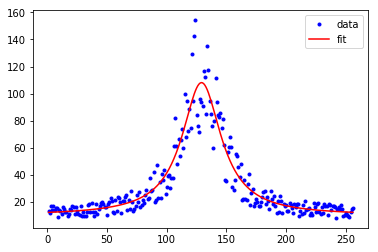

a1:  10.0454902498
a2:  39237.4690865
a3:  400.0
a4:  129.172415715


In [1]:
# 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(t, a1, a2, a3, a4):
    return a1+a2/(a3+(t-a4)**2)

## create data
ndata = 256 # number of data
xdata = np.arange(1, ndata+1) # [1, ..., ndata]
ydata = func(xdata, 10, 40000, 380, 128)*(0.6+0.8*np.random.rand(ndata)) # data with noises

## fit function to data
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [15, 41000, 400, 130]))

## draw graph
plt.plot(xdata, ydata, 'b.', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')
plt.legend()
plt.show()

## print parameters
print('a1: ', popt[0])
print('a2: ', popt[1])
print('a3: ', popt[2])
print('a4: ', popt[3])

**2**. 二山ピークへのフィット  
以下のように作成したデータ  
```
ndata:=256;  
f1:=t->subs({a=10,b=40000,c=380,d=128},a+b/(c+(t-d)^2) );  
f2:=t->subs({a=10,b=40000,c=380,e=90},a+b/(c+(t-e)^2) );  
T:=[seq((f1(i)+f2(i))*(0.6+0.2*evalf(rand()/10^12)),i=1..ndata)]:  
```
を $f(t) = a1+\frac{a2}{a3+(t-a4)^2}+\frac{a2}{a3+(t-a5)^2}$ で近似した時のパラメータ $a1, a2, a3, a4, a5$ を求めよ．

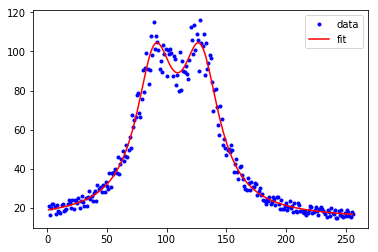

a1:  14.2063211776
a2:  27253.8992563
a3:  365.054876886
a4:  128.190653039
a5:  90.0912941539


In [2]:
# 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func_data(t, a, b, c, d):
    return a+b/(c+(t-d)**2)

def func(t, a1, a2, a3, a4, a5):
    return a1+a2/(a3+(t-a4)**2)+a2/(a3+(t-a5)**2)

## create data
ndata = 256
xdata = np.arange(1, ndata+1)
ydata1 = func_data(xdata, 10, 40000, 380, 128)
ydata2 = func_data(xdata, 10, 40000, 380, 90)
ydata = (ydata1 + ydata2)*(0.6 + 0.2*np.random.rand(ndata))

## fit function to data
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [15,50000,400,250,150]))

## draw graph
plt.plot(xdata, ydata, 'b.', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')
#plt.plot(xdata, ydata1, 'r.')
#plt.plot(xdata, ydata2, 'g.')
plt.legend()
plt.show()

## print parameters
print('a1: ', popt[0])
print('a2: ', popt[1])
print('a3: ', popt[2])
print('a4: ', popt[3])
print('a5: ', popt[4])